In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [3]:
beta_0 = 10
beta_1 = 0.3 
beta_2 = 0.5
alpha = 0.7

In [4]:
x_1 = []
for i in range(1,11):
    for m in range(20):
        x_1.append(i)

In [5]:
df = pd.DataFrame({"x_1":x_1})

In [7]:
# I am generating 100 random numbers from a normal distribution. 
# And I do that for 5 times. 
# Because each sample distribution is for each x. 
# Since this method is taking samples from the normal distribution, 
# they won't look exactly normal (b/c I'm taking a small # of samples) which is good. 
# I want every distribution for given x to look slightly different though the expectation is the same. 

error_term_1 = np.random.normal(loc=0,scale=1.5, size=20).tolist()
for i in range(9):
    error_term_1 = error_term_1 + np.random.normal(0, size=20).tolist()
    
# see the length 
print(len(error_term_1))
# count the # of unique values 
print(len(set(error_term_1)))

200
200


In [8]:
# I need another error term 

error_term_2 = np.random.normal(loc=0,scale=1.5, size=20).tolist()
for i in range(9):
    error_term_2 = error_term_2 + np.random.normal(0, size=20).tolist()
    
# see the length 
print(len(error_term_2))
# count the # of unique values 
print(len(set(error_term_2)))

200
200


$Y_i = \beta_0 + \beta_1X_{1i}+u_i$

$u_i = \beta_2X_{2i}+e_i$

$X_{2i} =  \alpha X_{1i} + \lambda_i$

$\beta_0=10$, $\beta_1 = 0.3$, $\beta_2 = 0.5$, $\alpha = 0.7$

In [10]:
df["e"] = error_term_1
df["l"] = error_term_2
df["x_2"] = alpha * df["x_1"] + df["l"]
df["u"] = beta_2 * df["x_2"] + df["e"]
df["y"] = beta_0 + beta_1*df["x_1"] + df["u"]

In [11]:
results = smf.ols('y ~ x_1', data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     447.6
Date:                Tue, 02 Feb 2021   Prob (F-statistic):           1.03e-52
Time:                        15:58:25   Log-Likelihood:                -331.20
No. Observations:                 200   AIC:                             666.4
Df Residuals:                     198   BIC:                             673.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.8409      0.195     50.571      0.0

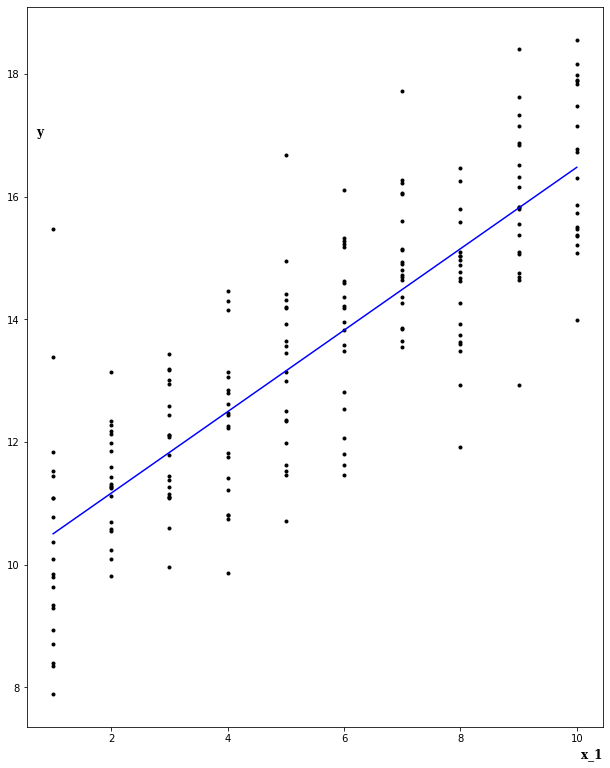

In [12]:
fig = plt.figure(figsize=(8,10))

ax = fig.add_axes([0,0,1,1])
ax.scatter("x_1", "y", data=df, color="black", marker=".")

x = df["x_1"]
bia_beta_0 = results.params[0]
bia_beta_1 = results.params[1]

ax.plot(x, bia_beta_0+(bia_beta_1*x), color='blue')


ax.text(0.7, 17,'y', fontsize='large', fontfamily='serif', ma='center', fontweight='bold')
ax.set_xlabel('x_1', loc='right', fontsize='large', fontfamily='serif', fontweight='bold')


plt.show()

In [13]:
results_2 = smf.ols('y ~ x_1 + x_2', data=df).fit()
print(results_2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     304.0
Date:                Tue, 02 Feb 2021   Prob (F-statistic):           6.09e-61
Time:                        16:00:55   Log-Likelihood:                -308.64
No. Observations:                 200   AIC:                             623.3
Df Residuals:                     197   BIC:                             633.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.7141      0.175     55.447      0.0

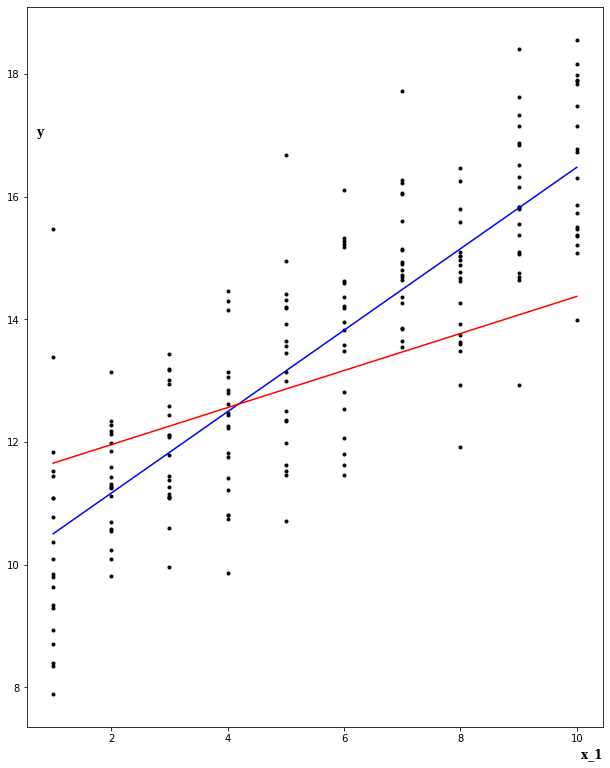

In [33]:
fig = plt.figure(figsize=(8,10))

ax = fig.add_axes([0,0,1,1])
ax.scatter("x_1", "y", data=df, color="black", marker=".")

x_1 = df["x_1"]
bia_beta_0 = results.params[0]
bia_beta_1 = results.params[1]

x_2 = 3
unbia_beta_0 = results_2.params[0]
unbia_beta_1 = results_2.params[1]
unbia_beta_2 = results_2.params[2]


ax.plot(x, bia_beta_0+(bia_beta_1*x_1), color='blue')
ax.plot(x, unbia_beta_0+(unbia_beta_1*x_1)+(unbia_beta_2*x_2), color='red')


ax.text(0.7, 17,'y', fontsize='large', fontfamily='serif', ma='center', fontweight='bold')
ax.set_xlabel('x_1', loc='right', fontsize='large', fontfamily='serif', fontweight='bold')


plt.show()

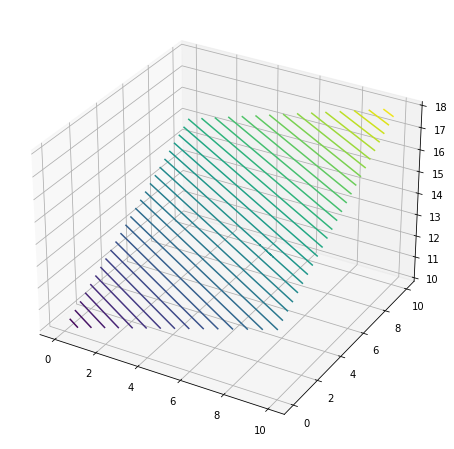

In [15]:
x1_line = np.linspace(0, 10, 1000)
x2_line = np.linspace(0, 10, 1000)

X1_line, X2_line = np.meshgrid(x1_line, x2_line)

y_line = beta_0 + (beta_1*X1_line) + (beta_2*X2_line)

fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')

ax.contour3D(X1_line, X2_line, y_line, 50)

In [16]:
print("The expected value of the error term, u for a given x_1 has a correlation with x_1")
print(df[df["x_1"]==1]["u"].mean())
print(df[df["x_1"]==5]["u"].mean())
print(df[df["x_1"]==10]["u"].mean())
print()
print("However, the expected value of the error term, e for a given x_1 doesn't have a correlaiton with x_1 ")
print(df[df["x_1"]==1]["e"].mean())
print(df[df["x_1"]==5]["e"].mean())
print(df[df["x_1"]==10]["e"].mean())

The expected value of the error term, u for a given x_1 has a correlation with x_1
0.06421035147695706
1.700972830327986
3.5168307541356247

However, the expected value of the error term, e for a given x_1 doesn't have a correlaiton with x_1 
-0.27535189972300955
-0.006115495911676625
0.12904848859473392


In [20]:
len(df["x_2"].unique())

200

In [23]:
fix_df = df[(df["x_2"]>2)&(df["x_2"]<3)]

In [24]:
fix_df.head()

,x_1,e,l,x_2,u,y
0,1,3.681936,2.265418,2.965418,5.164645,15.464645
22,2,-0.507591,0.939342,2.339342,0.662080,11.262080
24,2,-0.034113,1.443398,2.843398,1.387586,11.987586
26,2,-1.121934,1.032287,2.432287,0.094210,10.694210
27,2,-1.703831,1.303980,2.703980,-0.351841,10.248159


In [25]:
results_3 = smf.ols('y ~ x_1', data=fix_df).fit()
print(results_3.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     2.442
Date:                Tue, 02 Feb 2021   Prob (F-statistic):              0.129
Time:                        16:12:41   Log-Likelihood:                -51.015
No. Observations:                  31   AIC:                             106.0
Df Residuals:                      29   BIC:                             108.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.3253      0.586     19.336      0.0

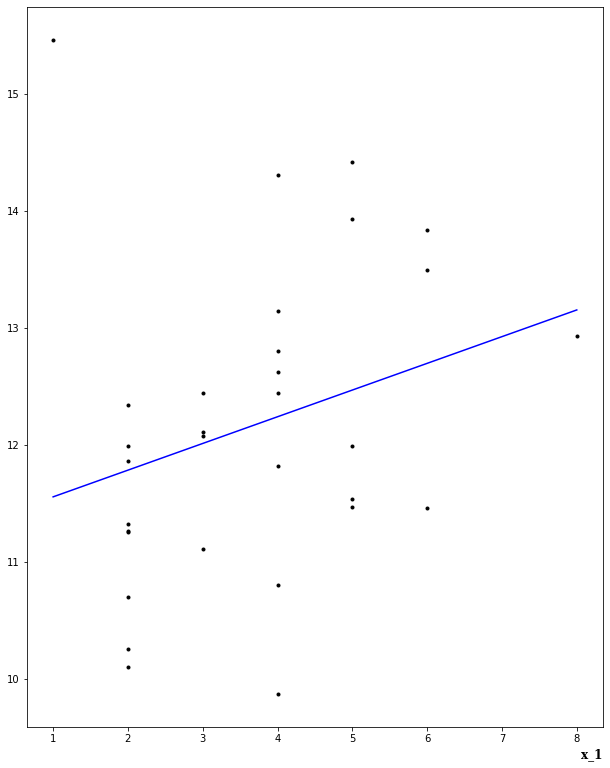

In [27]:
fig = plt.figure(figsize=(8,10))

ax = fig.add_axes([0,0,1,1])
ax.scatter("x_1", "y", data=fix_df, color="black", marker=".")

x_1 = fix_df["x_1"]

beta_0 = results_3.params[0]
beta_1 = results_3.params[1]


ax.plot(x_1, beta_0+(beta_1*x_1), color='blue')


#ax.text(0.7, 17,'y', fontsize='large', fontfamily='serif', ma='center', fontweight='bold')
ax.set_xlabel('x_1', loc='right', fontsize='large', fontfamily='serif', fontweight='bold')


plt.show()

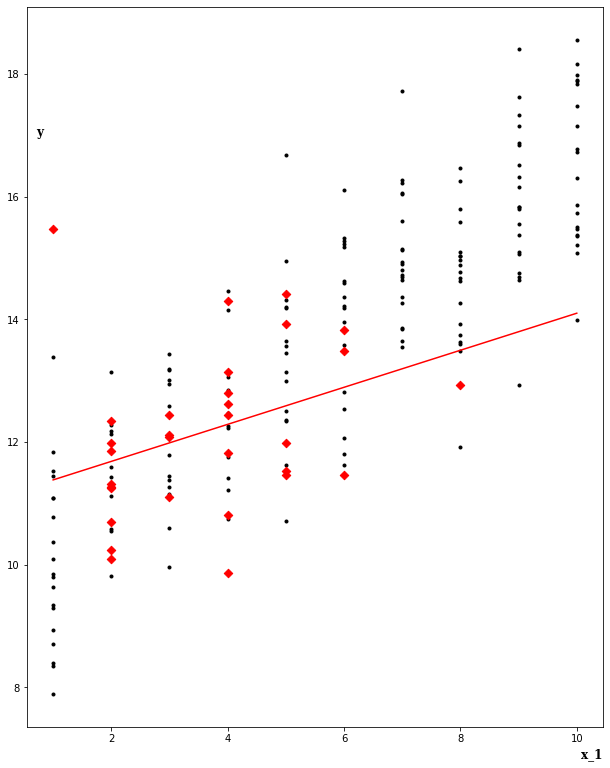

In [43]:
fig = plt.figure(figsize=(8,10))

ax = fig.add_axes([0,0,1,1])
ax.scatter("x_1", "y", data=df, color="black", marker=".")
ax.scatter("x_1", "y", data=fix_df, color="red", marker="D")


x_1 = df["x_1"]
bia_beta_0 = results.params[0]
bia_beta_1 = results.params[1]

x_2 = 2.5
unbia_beta_0 = results_2.params[0]
unbia_beta_1 = results_2.params[1]
unbia_beta_2 = results_2.params[2]


#ax.plot(x, bia_beta_0+(bia_beta_1*x_1), color='blue')
ax.plot(x, unbia_beta_0+(unbia_beta_1*x_1)+(unbia_beta_2*x_2), color='red')


ax.text(0.7, 17,'y', fontsize='large', fontfamily='serif', ma='center', fontweight='bold')
ax.set_xlabel('x_1', loc='right', fontsize='large', fontfamily='serif', fontweight='bold')


plt.show()

In [42]:
fix_df_2 = df[(df["x_2"]>5)&(df["x_2"]<6)]

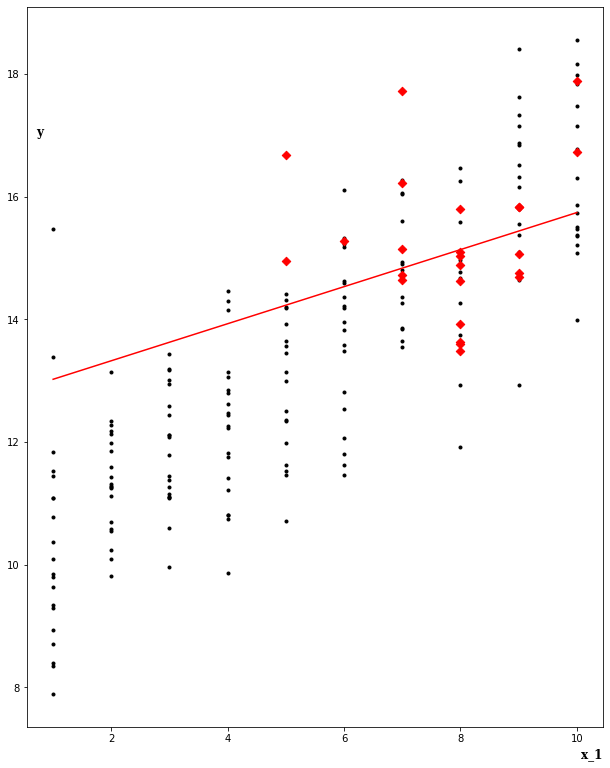

In [44]:
fig = plt.figure(figsize=(8,10))

ax = fig.add_axes([0,0,1,1])
ax.scatter("x_1", "y", data=df, color="black", marker=".")
ax.scatter("x_1", "y", data=fix_df_2, color="red", marker="D")


x_1 = df["x_1"]
bia_beta_0 = results.params[0]
bia_beta_1 = results.params[1]

x_2 = 5.5
unbia_beta_0 = results_2.params[0]
unbia_beta_1 = results_2.params[1]
unbia_beta_2 = results_2.params[2]


#ax.plot(x, bia_beta_0+(bia_beta_1*x_1), color='blue')
ax.plot(x, unbia_beta_0+(unbia_beta_1*x_1)+(unbia_beta_2*x_2), color='red')


ax.text(0.7, 17,'y', fontsize='large', fontfamily='serif', ma='center', fontweight='bold')
ax.set_xlabel('x_1', loc='right', fontsize='large', fontfamily='serif', fontweight='bold')


plt.show()

# The Least Squares Assumptions in Multiple Regression

## Assumption #1: The Conditional Distribution of $U_i$ Given $X_{1i}$, $X_{2i}$, ..., $X_{ki}$ Has a Mean of Zero.


$E[U_i|X_{1i}, X_{2i}..., X_{ki}] = 0$


This is a baseline assumption when there are no omitted variables in the error term. In thise case we can use all of the coefficients for causal interpretation. 

$Y_i = \beta_0 + \beta_1X_{1i} + \beta_2X_{2i} + u_i $

### However, this is very unlikely. So what we usally do is analyzing caual effect of one variable using multiple regression. 

$Y_i = \beta_0 + \beta_1X_{1i} + u_i $

Say we want to estimate the coefficient $\beta_1$. **This is the object of interest.**

However, if there is a omitted determinant of $Y_i$ that is correlated with $X_{1i}$, then OLS estimation of the $\beta_1$ will be biased. 

$Y_i = \beta_0 + \beta_1X_{1i} + u_i $

$u_i = \beta_2X_{2i} + e_i$

$X_{2i} = \alpha X_{1i}+ \lambda_i$

$u_i = \beta_2 (\alpha X_{1i}+ \lambda_i) + e_i = \beta_2 \alpha X_{1i}+ \beta_2 \lambda_i + e_i$

Therefore, if you estimate without including $X_{2i}$ then you will get this: 

$Y_i = \beta_0 + (\beta_1 + \beta_2 \alpha) X_{1i} + (\beta_2\lambda_i + e_i)$

This is because of the following: 

$E[u_i|X_{1i}]$ is not constant. It should be zero to be unbaised.

$E[u_i|X_{1i}] = E[\beta_2 \alpha X_{1i}+ \beta_2 \lambda_i + e_i|X_{1i}]$

$E[u_i|X_{1i}] = \beta_2 \alpha X_{1i} $

We are assuming that $E[\beta_2 \lambda_i + e_i|X_{1i}] = 0$

We are only interested in $\beta_2$. So we include all the omitted variables that determines $Y_i$ and are correlated with $X_{1i}$.

Let's say there was only one omitted variable $X_{2i}$. So we included it as below. 

$Y_i = \beta_0 + \beta_1X_{1i} + \beta_2X_{2i} + (\beta_2\lambda_i + e_i)$

$Y_i = \beta_0 + \beta_1X_{1i} + \beta_2X_{2i} + z_i$

So now there is no omitted variable that is correlated with $X_{1i}$. 

Therefore, $E[z_i|X_{1i}] = 0$

### However, this doesn't mean that there are no omitted variables that are correlated with $X_{2i}$. 

There could be omitted variables in $Z_i$, which means: $E[z_i|X_{2i}] =  E[z_i|X_{1i}, X_{2i}]$ and they are not constant. 

Let's see why.

$z_i = (\beta_2\lambda_i + e_i)$

We got $\lambda_i$ from this equation: $X_{2i} = \alpha X_{1i}+ \lambda_i$

Can we say that $E[\lambda_i|X_{2i}] = 0$? No! Because of the following:  

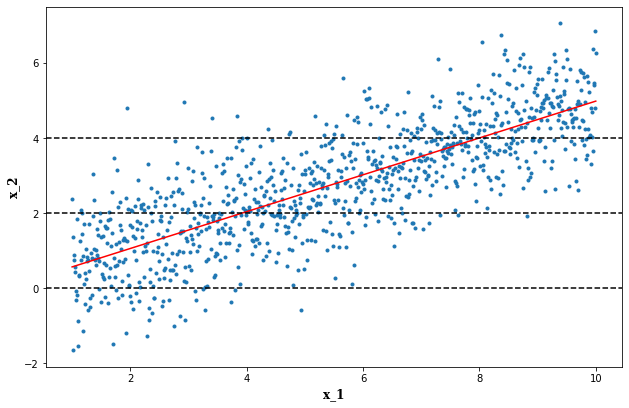

In [91]:
alpha = 0.5 

x_1 = np.linspace(start=1, stop=10, num=1000)
lmda = np.random.normal(loc=0, scale=1, size=1000)
x_2 = alpha*x_1 + lmda

df_2 = pd.DataFrame({"x_2":x_2, "x_1":x_1, "lmda":lmda})

fig = plt.figure(figsize=(8,5))

ax = fig.add_axes([0,0,1,1])

ax.scatter(x="x_1", y="x_2", data=df_2, marker=".")

ax.set_ylabel('x_2', fontsize='large', fontfamily='serif', fontweight='bold')
ax.set_xlabel('x_1', fontsize='large', fontfamily='serif', fontweight='bold')

results_4 = smf.ols('x_2 ~ x_1', data=df_2).fit()

int_ = results_4.params[0]
slope = results_4.params[1]

ax.plot(x_1, int_ + slope*x_1, color="red")

ax.axhline(y=0, linestyle="--", color="black")
ax.axhline(y=2, linestyle="--", color="black")
ax.axhline(y=4, linestyle="--", color="black")



plt.show()

$E[\lambda_i|X_{2i}]$ goes from negative to positive as $X_2$ increases. 

And from the mathematical point of view: 

$E[\lambda_i|X_{2i}]$ 

$ = E[X_{2i} - \alpha X_{1i}|X_{2i}]$

$ = X_{2i} - \alpha E[X_{1i}|X_{2i}]$

So $E[\lambda_i|X_{2i}]$ is not constant. 

Let's also check $E[e_i|X_{2i}]$. We are assuming that there is an omitted variable that is correlated with $X_{2i}$ in $e_i$. 

$e_i = \beta_3(\alpha X_{2i} + k_i) + p_i$

Therefore, $E[e_i|X_{2i}]$ is not constant as well. 

Therefore, $E[z_i|X_{2i}]$ is not constant as well. 

In this case, $E[z_i|X_{1i}, X_{2i}]$ results in same as $E[z_i|X_{2i}]$.

$E[z_i|X_{1i}, X_{2i}] = E[\beta_2 \lambda_i + e_i|X_{1i}, X_{2i}]$

= $E[\beta_2 \lambda_i|X_{1i}, X_{2i}] + E[e_i|X_{1i}, X_{2i}]$

And they are not constant, because even if we control $X_{1i}$, $\lambda_i$ and $e_i$ are dependent on $X_{2i}$.

### Therefore, $\beta_2$ will be biased.

### But $\beta_1$ is not biased. So we can use it for causal interpretation. 

We call $X_{2i}$ a control variable. We set $X_{2i}$ to be a certain value. Therefore, $X_{1i}$ is the only variable that can change and its coefficient has causual interpretation. (we shouldn't include $\beta_0$ for interpretation. Because it is picking up biased estimator $\beta_2$.)